In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread
BASE_IMG_PATH=os.path.join('data','3D_images')

In [6]:
glob(os.path.join(BASE_IMG_PATH,'*'))

['data\\3D_images\\IMG_0002.nii.gz',
 'data\\3D_images\\IMG_0031.nii.gz',
 'data\\3D_images\\IMG_0059.nii.gz',
 'data\\3D_images\\IMG_0078.nii.gz',
 'data\\3D_images\\MASK_0002.nii.gz',
 'data\\3D_images\\MASK_0031.nii.gz',
 'data\\3D_images\\MASK_0059.nii.gz',
 'data\\3D_images\\MASK_0078.nii.gz']

In [8]:
# show some of the files
all_images=glob(os.path.join(BASE_IMG_PATH,'IMG_*'))
all_masks = [x.replace('IMG_', 'MASK_') for x in all_images]
print(len(all_images),' matching files found:',all_images[0], all_masks[0])

4  matching files found: data\3D_images\IMG_0002.nii.gz data\3D_images\MASK_0002.nii.gz


Text(0.5, 1.0, 'Mask')

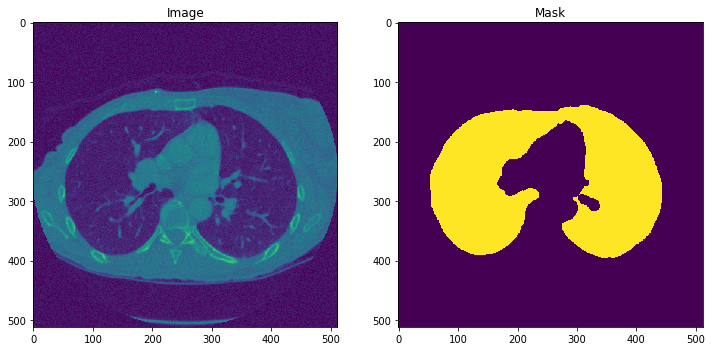

In [10]:
%matplotlib inline
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')

test_image=nib.load(all_images[0]).get_data()
test_mask=nib.load(all_masks[0]).get_data()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[test_image.shape[0]//2])
ax1.set_title('Image')
ax2.imshow(test_mask[test_image.shape[0]//2])
ax2.set_title('Mask')

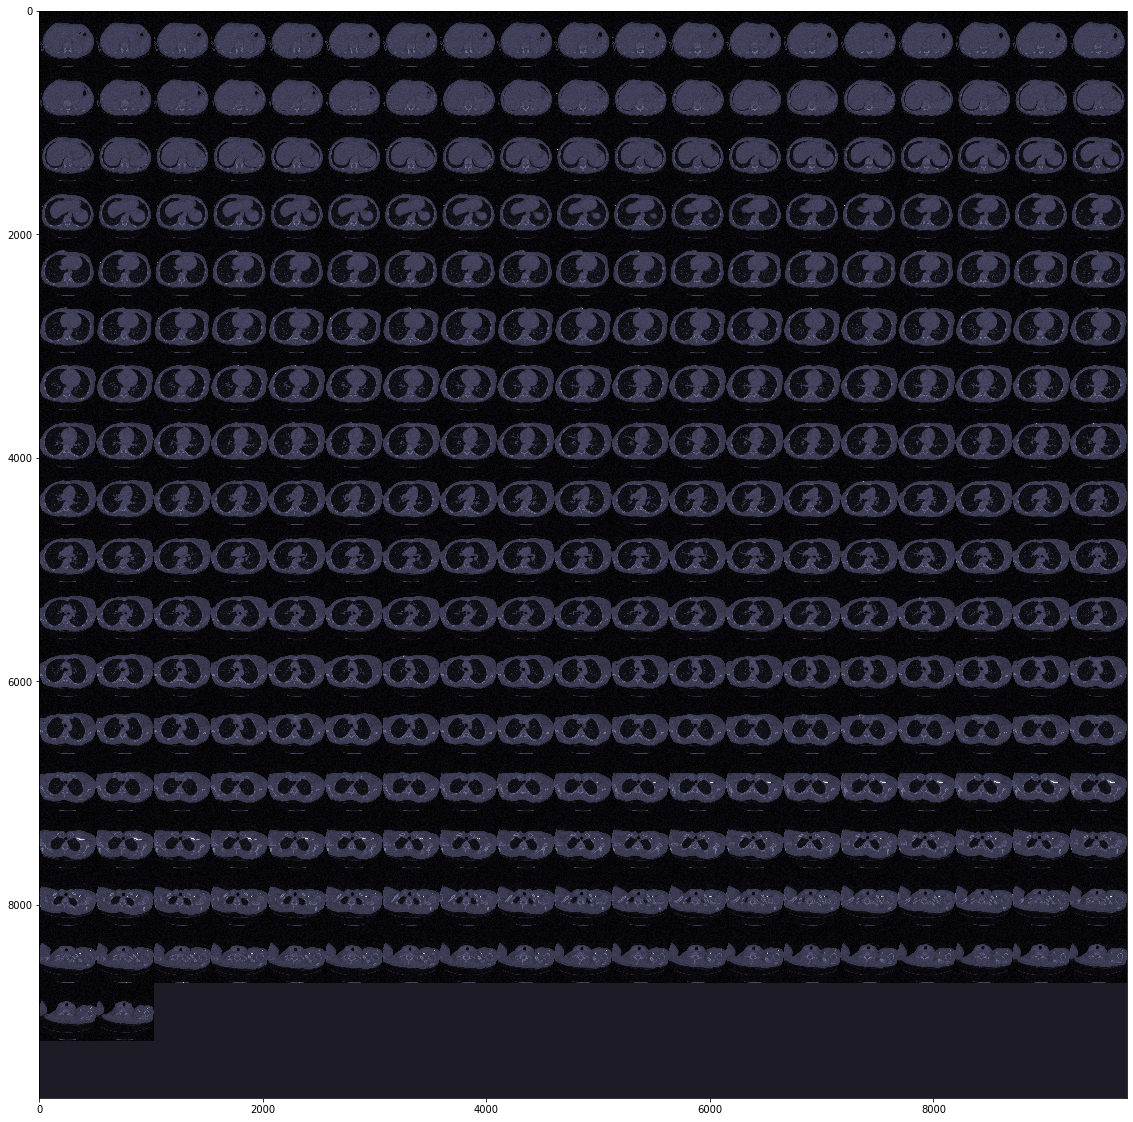

In [11]:
from skimage.util import montage
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage(test_image), cmap ='bone')
fig.savefig('ct_scan.png')

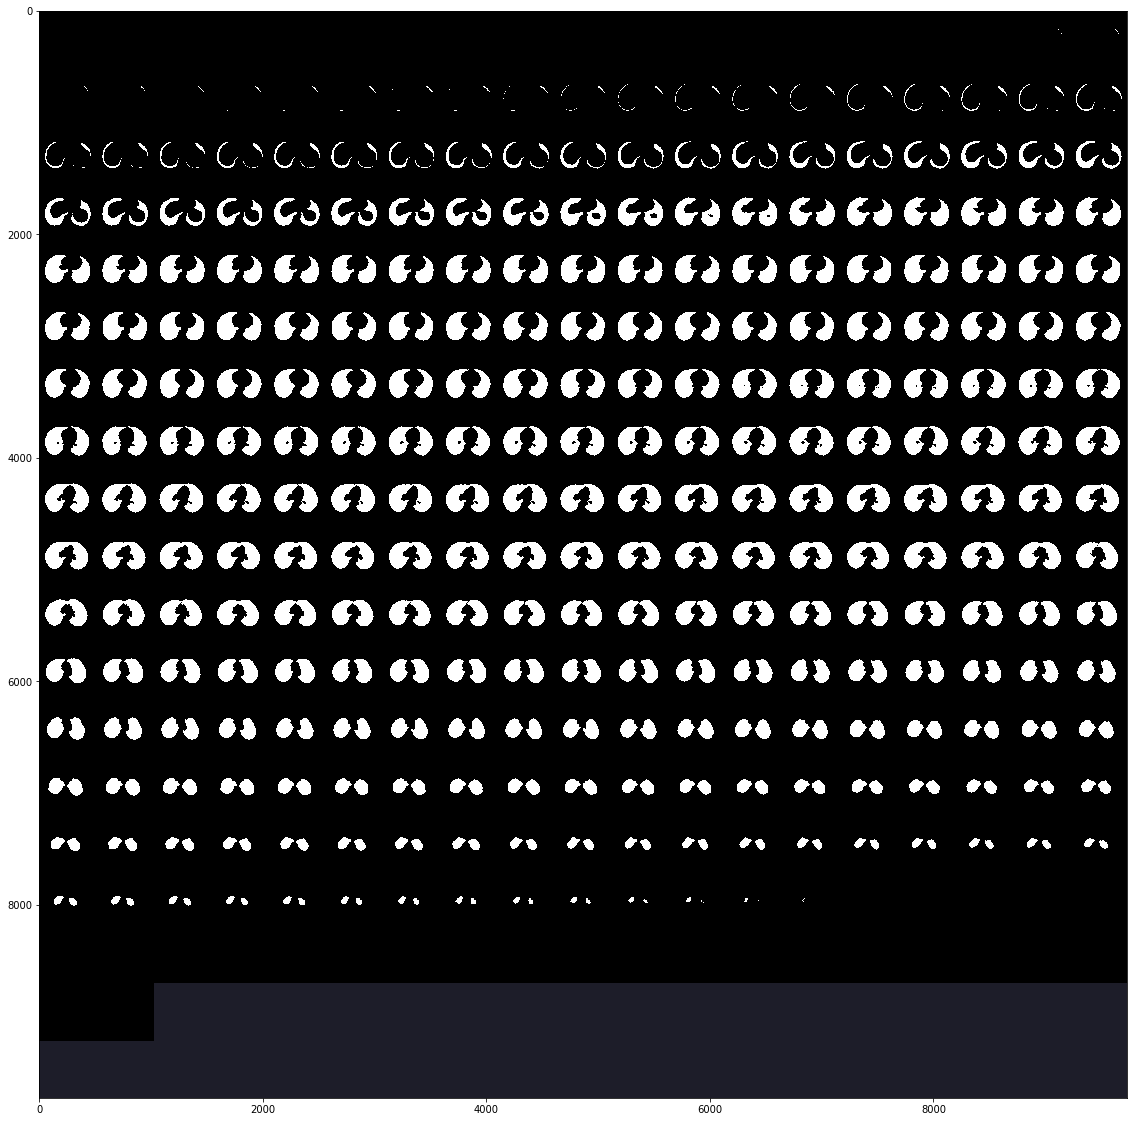

In [12]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 20))
ax1.imshow(montage(test_mask), cmap ='bone')
fig.savefig('lung_mask.png')